In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

 RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: recency, frequency, and monetary value. These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.
 
 
The given dataset is provided by an e-commerce platform containing customer transaction data including customer ID, purchase date, transaction amount, product information, ID command and location. The platform aims to leverage RFM (recency, frequency, monetary value) analysis to segment customers and optimize customer engagement strategies.

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\rfm_data.csv")
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
df.shape

(1000, 6)

In [4]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [5]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

### Calculating RFM Values
I’ll now calculate the Recency, Frequency, and Monetary values of the customers to move further:

In [68]:
#converting PurchaseDate to datetime object
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
#calculating the last date a purchase was made in our date set
max_date = df['PurchaseDate'].max()

#Calculating Recency
df['Recency'] = (max_date - df['PurchaseDate']).dt.days

#calculating frequency
Frequency = df.groupby('CustomerID')['OrderID'].count().reset_index()
Frequency.rename(columns = {'OrderID' : 'Frequency'}, inplace =True)
df = df.merge(Frequency, on = 'CustomerID', how = 'left')

#calculating the monetary value
value = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
value.rename(columns={'TransactionAmount': 'Value'}, inplace=True)
df = df.merge(value, on = 'CustomerID', how= 'left')


To calculate recency, we subtracted the purchase date from the Last purchase date in the dataset extracted the number of days. It gives us the number of days since the customer’s last purchase, representing their recency value.

After that, we calculated the frequency for each customer. We grouped the data by ‘CustomerID’ and counted the number of unique ‘OrderID’ values to determine the number of purchases made by each customer. It gives us the frequency value, representing the total number of purchases made by each customer.

Finally, we calculated the monetary value for each customer. We grouped the data by ‘CustomerID’ and summed the ‘TransactionAmount’ values to calculate the total amount spent by each customer. It gives us the monetary value, representing the total monetary contribution of each customer.

In [80]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Value
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56


#### Calculating RFM Scores
Now let’s calculate the recency, frequency, and monetary scores:

In [83]:
# Defining score labels
recency_scores = [5, 4, 3, 2, 1] # 5 for lower score and 1 for higher
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

#Calculating the scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['Value'], bins=5, labels=monetary_scores)

We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

To calculate RFM scores, we used the pd.cut() function to divide recency, frequency, and monetary values into bins. We define 5 bins for each value and assign the corresponding scores to each bin.

In [84]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

#### RFM Value Segmentation
Now let’s calculate the final RFM score and the value segment according to the scores:

In [85]:
# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q =3 , labels= segment_labels)

To calculate the RFM score, we add the scores obtained for recency, frequency and monetary value.

After calculating the RFM scores, we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

In [90]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,1,1,2,4,Low-Value


#### Now let’s have a look at the segment distribution:


C:\Users\dell\AppData\Local\Temp\ipykernel_6332\1615098176.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Value Segment').size().plot(kind='bar');


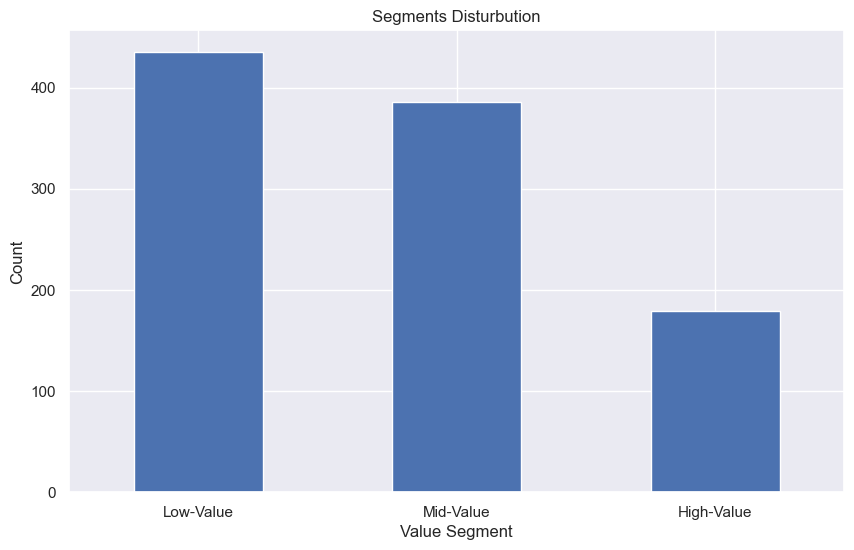

In [96]:
plt.figure(figsize=(10,6));
df.groupby('Value Segment').size().plot(kind='bar');
plt.xticks(rotation=0);
plt.ylabel('Count');
plt.title('Segments Disturbution');

Now let’s create and analyze RFM Customer Segments that are broader classifications based on the RFM scores. These segments, such as “Champions”, “Potential Loyalists”, and “Can’t Lose” provide a more strategic perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects. Here’s how to create the RFM customer segments:

In [97]:
df['RFM_Customer_Segments'] = ''
df.loc[df['RFM_Score'] >= 9, 'RFM_Customer_Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM_Customer_Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM_Customer_Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM_Customer_Segments'] = "Lost"

In the above code, we are assigning RFM segments to customers based on their RFM scores and then creating a new column called “RFM Customer Segments” in the data.

In [99]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Value,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment,RFM_Customer_Segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,1,1,2,4,Low-Value,Can't Lose
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,1,1,1,3,Low-Value,Lost
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,1,1,1,3,Low-Value,Lost
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,1,1,1,3,Low-Value,Lost
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,1,1,2,4,Low-Value,Can't Lose


#### RFM Analysis
Now let’s analyze the distribution of customers across different RFM customer segments within each value segment:

In [101]:
segment_count = df.groupby(['Value Segment', 'RFM_Customer_Segments']).size().reset_index(name='Count')
segment_count.sort_values('Count', ascending=False, inplace=True, ignore_index=True )
segment_count

C:\Users\dell\AppData\Local\Temp\ipykernel_6332\700086111.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_count = df.groupby(['Value Segment', 'RFM_Customer_Segments']).size().reset_index(name='Count')


,Value Segment,RFM_Customer_Segments,Count
0,Mid-Value,Potential Loyalists,386
1,Low-Value,At Risk Customers,180
2,Low-Value,Can't Lose,173
3,High-Value,Potential Loyalists,117
4,Low-Value,Lost,82
5,High-Value,Champions,62
6,Low-Value,Champions,0
7,Low-Value,Potential Loyalists,0
8,Mid-Value,At Risk Customers,0
9,Mid-Value,Can't Lose,0


In [102]:
import plotly.express as px


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



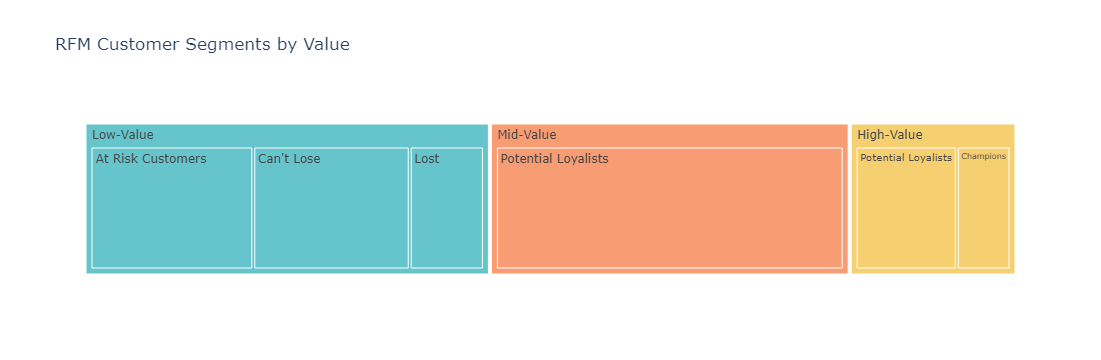

In [116]:
px.treemap(segment_count, path=['Value Segment', 'RFM_Customer_Segments'], values='Count', 
           color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel, 
           title='RFM Customer Segments by Value')

Now let’s analyze the distribution of RFM values within the Champions segment:

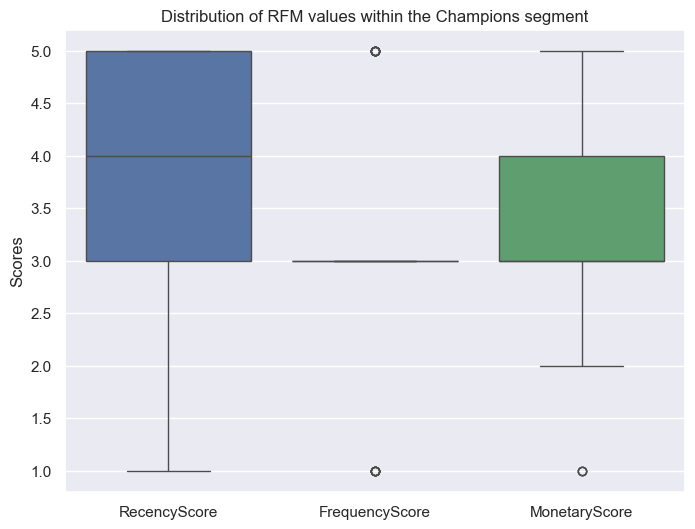

In [127]:
plt.figure(figsize=(8,6));
#selecting only the data for the champions segment
champions = df[df['RFM_Customer_Segments'] == 'Champions']
#plotting it in a boxplot
sns.boxplot(champions[['RecencyScore', 'FrequencyScore', 'MonetaryScore']]);
plt.ylabel('Scores');
plt.title('Distribution of RFM values within the Champions segment');

Now let’s analyze the correlation of the recency, frequency, and monetary scores within the champions segment:

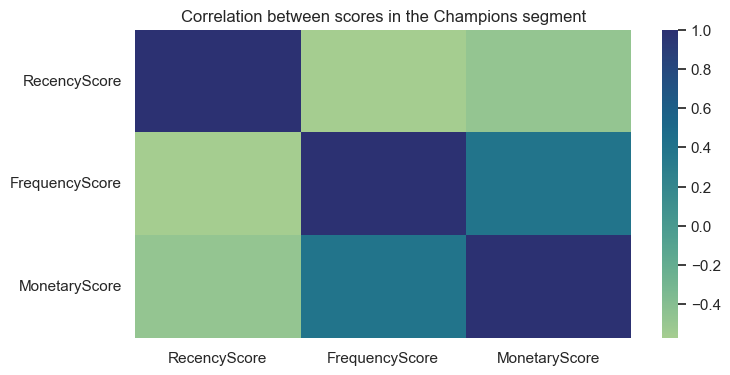

In [136]:
plt.figure(figsize=(8,4));
corr_matrix = champions[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()
sns.heatmap(corr_matrix, cmap="crest");
plt.title('Correlation between scores in the Champions segment');

Now let’s have a look at the number of customers in all the segments:

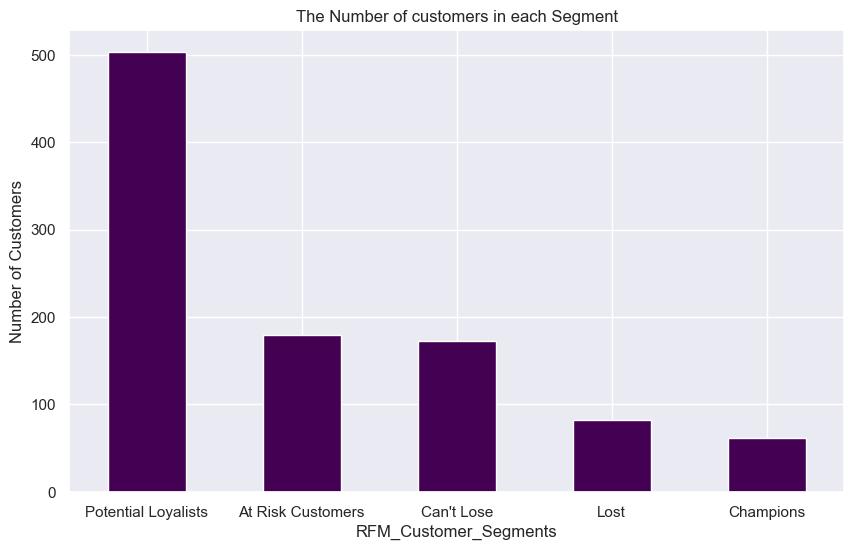

In [148]:
df.groupby('RFM_Customer_Segments').size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6),
                                                                             ylabel = 'Number of Customers',
                                                                            title = 'The Number of customers in each Segment',
                                                                             colormap = 'viridis');
                                                                        
plt.xticks(rotation=0);


Now let’s have a look at the recency, frequency, and monetary scores of all the segments:

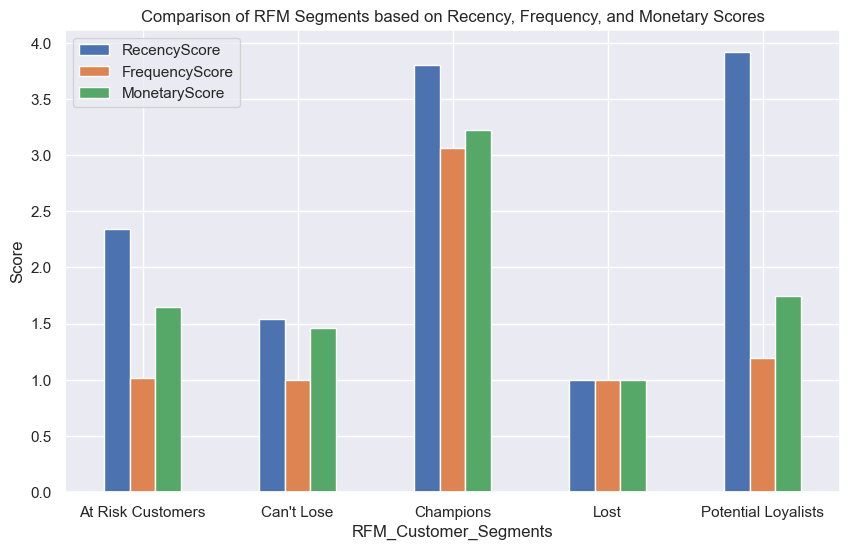

In [166]:
segment = df.groupby('RFM_Customer_Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean()
segment.plot(kind='bar', ylabel='Score', title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
            figsize=(10,6));
plt.xticks(rotation=0);